# Librerias necesarias

In [95]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import random
from gurobipy import *


Subir info 

In [99]:
demanda = pd.read_csv('info_demanda.csv')
original_estaciones = pd.read_csv('info_estaciones.csv')

In [100]:
solo_chapi = pd.read_csv('solochapi.csv')

# Procesamiento de información

In [101]:
estaciones = original_estaciones.loc[:,['Local de la Estación',	'Estación',	'Codigo Estación',	'Nombre Estación', 'Localidad', 'sem25']]
estaciones

,Local de la Estación,Estación,Codigo Estación,Nombre Estación,Localidad,sem25
0,NaN,NaN,NaN,NaN,ns,585
1,"4.6658027,-74.0528436",001 - Centro Comercial Andino,1.0,Centro Comercial Andino,Chapinero,451
2,"4.631379,-74.064615",059 - U. Piloto,59.0,U. Piloto,Chapinero,378
3,"4.6433691,-74.0625285",091 - CL 57 con KR 7,91.0,CL 57 con KR 7,Chapinero,312
4,"4.663925,-74.053278",033 - Parque Vecinal El Nogal,33.0,Parque Vecinal El Nogal,Chapinero,305
...,...,...,...,...,...,...
279,"4.6449009,-74.0677208",274 - KR 16 con CL 57,274.0,KR 16 con CL 57,ns,16
280,"4.698798,-74.045248",015 - CL 119 con KR 16,15.0,CL 119 con KR 16,ns,15
281,"4.699656,-74.038118",238 - CL 120 con KR 11D,238.0,CL 120 con KR 11D,ns,13
282,"4.6592193,-74.072547",297 - KR 27A con CL 66,297.0,KR 27A con CL 66,ns,12


In [102]:
name = estaciones["Local de la Estación"].str.split(',', expand=True)
name.columns = ['latitud', 'longitud']

In [103]:
estaciones = pd.concat([estaciones, name], axis=1)


In [104]:
estaciones

,Local de la Estación,Estación,Codigo Estación,Nombre Estación,Localidad,sem25,latitud,longitud
0,NaN,NaN,NaN,NaN,ns,585,NaN,NaN
1,"4.6658027,-74.0528436",001 - Centro Comercial Andino,1.0,Centro Comercial Andino,Chapinero,451,4.6658027,-74.0528436
2,"4.631379,-74.064615",059 - U. Piloto,59.0,U. Piloto,Chapinero,378,4.631379,-74.064615
3,"4.6433691,-74.0625285",091 - CL 57 con KR 7,91.0,CL 57 con KR 7,Chapinero,312,4.6433691,-74.0625285
4,"4.663925,-74.053278",033 - Parque Vecinal El Nogal,33.0,Parque Vecinal El Nogal,Chapinero,305,4.663925,-74.053278
...,...,...,...,...,...,...,...,...
279,"4.6449009,-74.0677208",274 - KR 16 con CL 57,274.0,KR 16 con CL 57,ns,16,4.6449009,-74.0677208
280,"4.698798,-74.045248",015 - CL 119 con KR 16,15.0,CL 119 con KR 16,ns,15,4.698798,-74.045248
281,"4.699656,-74.038118",238 - CL 120 con KR 11D,238.0,CL 120 con KR 11D,ns,13,4.699656,-74.038118
282,"4.6592193,-74.072547",297 - KR 27A con CL 66,297.0,KR 27A con CL 66,ns,12,4.6592193,-74.072547


In [105]:
estaciones['latitud'] = estaciones['latitud'].astype(float)
estaciones['longitud'] = estaciones['longitud'].astype(float)

In [106]:
longitudes = estaciones[estaciones.columns[7:]].to_numpy()
latitudes = estaciones[estaciones.columns[6:7]].to_numpy()

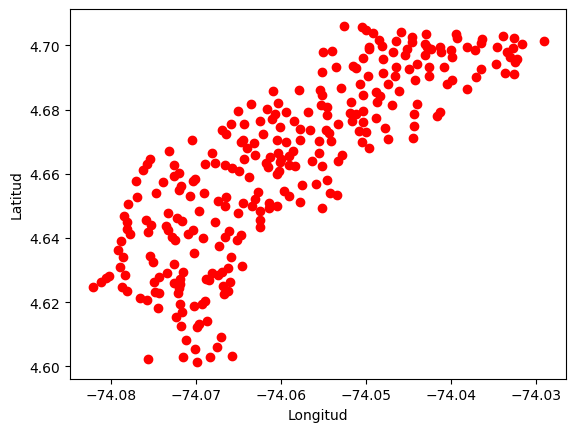

In [107]:
import matplotlib.pyplot as plt

# Coordenadas de ejemplo
#latitudes = [40.71, 41.88, 37.77]
#longitudes = [-74.00, -87.63, -122.41]

# Plotear las coordenadas en un mapa
plt.plot(longitudes, latitudes, 'ro')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Chapinero 


In [108]:
solo_chapi

,Local de la Estación,Estación,Localidad,cod,Codigo Estación,Nombre Estación,demanda
0,"4.6658027,-74.0528436",001 - Centro Comercial Andino,Chapinero,1,1,Centro Comercial Andino,451
1,"4.631379,-74.064615",059 - U. Piloto,Chapinero,2,59,U. Piloto,378
2,"4.6433691,-74.0625285",091 - CL 57 con KR 7,Chapinero,3,91,CL 57 con KR 7,312
3,"4.663925,-74.053278",033 - Parque Vecinal El Nogal,Chapinero,4,33,Parque Vecinal El Nogal,305
4,"4.6392705,-74.0651798",057 - KR 13 con CL 52,Chapinero,5,57,KR 13 con CL 52,292
...,...,...,...,...,...,...,...
76,"4.6665425,-74.0603188",161 - Est. TM Heroes,Chapinero,77,161,Est. TM Heroes,40
77,"4.663703,-74.060099",189 - KR 16A con CL 76,Chapinero,78,189,KR 16A con CL 76,32
78,"4.6271214,-74.0688566",020 - AK 14 con CL 39,Chapinero,79,20,AK 14 con CL 39,28
79,"4.6282058,-74.0801588",019 - AK 30 con CL 39Bis B,Chapinero,80,19,AK 30 con CL 39Bis B,28


In [109]:
name = solo_chapi["Local de la Estación"].str.split(',', expand=True)
name.columns = ['latitud', 'longitud']

In [110]:
solo_chapi = pd.concat([solo_chapi, name], axis=1)


In [111]:
solo_chapi['latitud'] = solo_chapi['latitud'].astype(float)
solo_chapi['longitud'] = solo_chapi['longitud'].astype(float)

In [112]:
solo_chapi

,Local de la Estación,Estación,Localidad,cod,Codigo Estación,Nombre Estación,demanda,latitud,longitud
0,"4.6658027,-74.0528436",001 - Centro Comercial Andino,Chapinero,1,1,Centro Comercial Andino,451,4.665803,-74.052844
1,"4.631379,-74.064615",059 - U. Piloto,Chapinero,2,59,U. Piloto,378,4.631379,-74.064615
2,"4.6433691,-74.0625285",091 - CL 57 con KR 7,Chapinero,3,91,CL 57 con KR 7,312,4.643369,-74.062528
3,"4.663925,-74.053278",033 - Parque Vecinal El Nogal,Chapinero,4,33,Parque Vecinal El Nogal,305,4.663925,-74.053278
4,"4.6392705,-74.0651798",057 - KR 13 con CL 52,Chapinero,5,57,KR 13 con CL 52,292,4.639271,-74.065180
...,...,...,...,...,...,...,...,...,...
76,"4.6665425,-74.0603188",161 - Est. TM Heroes,Chapinero,77,161,Est. TM Heroes,40,4.666543,-74.060319
77,"4.663703,-74.060099",189 - KR 16A con CL 76,Chapinero,78,189,KR 16A con CL 76,32,4.663703,-74.060099
78,"4.6271214,-74.0688566",020 - AK 14 con CL 39,Chapinero,79,20,AK 14 con CL 39,28,4.627121,-74.068857
79,"4.6282058,-74.0801588",019 - AK 30 con CL 39Bis B,Chapinero,80,19,AK 30 con CL 39Bis B,28,4.628206,-74.080159


Distancias

In [113]:
import pandas as pd
from geopy.distance import distance
import numpy as np

# Leer la base de datos de estaciones
solo_chapi
# Crear matriz de distancias
num_estaciones = len(solo_chapi)
distancias = np.zeros((num_estaciones, num_estaciones))

for i in range(num_estaciones):
    for j in range(i+1, num_estaciones):
        # Calcular la distancia entre las estaciones i y j
        coords_i = (solo_chapi['latitud'][i], solo_chapi['longitud'][i])
        coords_j = (solo_chapi['latitud'][j], solo_chapi['longitud'][j])
        dist = distance(coords_i, coords_j).km
        
        # Almacenar la distancia en la matriz
        distancias[i, j] = dist
        distancias[j, i] = dist
        

In [114]:
# Mostrar la matriz de distancias
print(distancias)

[[0.         4.0244647  2.70348329 ... 4.63176907 5.14496494 0.8014771 ]
 [4.0244647  0.         1.34594415 ... 0.66570889 1.76005293 3.71222008]
 [2.70348329 1.34594415 0.         ... 1.9290237  2.57650623 2.36746839]
 ...
 [4.63176907 0.66570889 1.9290237  ... 0.         1.25980098 4.26267853]
 [5.14496494 1.76005293 2.57650623 ... 1.25980098 0.         4.60821091]
 [0.8014771  3.71222008 2.36746839 ... 4.26267853 4.60821091 0.        ]]


# Ejemplo modelo 

Conjuntos

In [115]:
# Conjuntos
S = range(1, 40)  # Set of possible facility locations
D = range(1, 82)  # Set of demand points
T = [1, 2, 3]  # Set of facility sizes


Parametros

In [116]:
# Cost of building a facility of size t at location s
C = {(s, t): 1000 + 500 * t for s in S for t in T} 

In [117]:
# Demanda
demanda = solo_chapi.loc[:,['cod','demanda']]
Dj = demanda.set_index('cod')['demanda'].to_dict()


In [118]:
# Maximum budget
B = 100000  

In [119]:
# Distance between facilities s and s'

def distancia(i,j):
  coords_i = (solo_chapi['latitud'][i], solo_chapi['longitud'][i])
  coords_j = (solo_chapi['latitud'][j], solo_chapi['longitud'][j])
  dist = distance(coords_i, coords_j).km
  return dist

d = {(s, s2): distancia(s,s2) for s in S for s2 in S}  

In [120]:
# Maximum distance between facilities
Dm = 6

In [121]:
# Capacity of a facility of size t

Q = {t:30 * t for t in T} 

In [122]:
# 1 if facility s is within a fixed minimum distance from demand point j, 0 otherwise

r = {(s, j): 1 for s in S for j in D} 

In [123]:
# Crear modelo
m = Model('Facility Location')

Variables de decision

In [124]:
# Crear variables de decisión
x = m.addVars(S, T, vtype=GRB.BINARY, name="x")  # 1 if facility of size t is built at location s
y = m.addVars(S, D, vtype=GRB.BINARY, name="y")  # 1 if facility s is assigned to serve demand point j

Funcion Objetivo

In [125]:
# Función objetivo: maximizar la demanda total servida por las instalaciones
m.setObjective(quicksum(Dj[j] * quicksum(y[s, j] for s in S) for j in D), GRB.MAXIMIZE)

Restricciones

In [126]:
# Restricción del presupuesto
m.addConstr(quicksum(C[s, t] * x[s, t] for s in S for t in T) <= B, name="Budget")

# Restricción de asignación
m.addConstrs(quicksum(y[s, j] for s in S) <= 1 for j in D)

# Restricción de distancia mínima
m.addConstrs(y[s, j] <= r[s, j] for s in S for j in D)

# Restricción de capacidad
m.addConstrs(quicksum(Dj[j] * y[s, j] for j in D) <= Q[t] * x[s, t] for s in S for t in T)

# Restricción de distancia máxima entre instalaciones
#m.addConstrs(quicksum((d[s, s2] * x[s, t] * x[s2, t2]) for s in S for s2 in S for t in T for t2 in T) <= Dm ** 2)

# Vinculación entre las variables de asignación y construcción de instalaciones
m.addConstrs(y[s, j] <= x[s, t] for s in S for j in D for t in T)

m.addConstrs(quicksum(x[s,t] for t in T) <= 1 for s in S)


{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [127]:
# Optimizar modelo
m.optimize()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads



GurobiError: ignored

In [ ]:
# Imprimir resultado
if m.status == GRB.OPTIMAL:
    print(f"Objetivo: {m.objVal:.2f}")
    print("Instalaciones construidas:")
    for s in S:
        for t in T:
            if x[s, t].x > 0.5:
                print(f"Facility {s} of size {t} is built.")
                print("Demandas atendidas:")
                for j in D:
                  for s in S:
                    if y[s, j].x > 0.5:
                      print(f"Demand point {j} is served by facility {s}.")
                    #else:
                      #print("El modelo no pudo ser resuelto.")



# Ejemplo 2 - Instancias creadas

In [68]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import random
from gurobipy import *

In [170]:
# Conjuntos
S = list(range(1, 10))  # Set of possible facility locations
D = list(range(1, 26))  # Set of demand points
T = [1, 2, 3]  # Set of facility sizes

In [171]:
C = {(s, t): 1000 + 500 * t for s in S for t in T}  # Cost of building a facility of size t at location s

In [172]:
#demanda

demanda = [ ]
 
for i in range (25):
    demanda.append(random.randint(1, 100))
 
data = {'COD': D, 'demanda': demanda}

df_demanda = pd.DataFrame(data)

Dj = df_demanda.set_index('COD')['demanda'].to_dict()

In [183]:
Dj

{1: 23,
 2: 11,
 3: 39,
 4: 8,
 5: 49,
 6: 73,
 7: 65,
 8: 31,
 9: 89,
 10: 36,
 11: 11,
 12: 65,
 13: 39,
 14: 49,
 15: 35,
 16: 89,
 17: 33,
 18: 7,
 19: 64,
 20: 77,
 21: 10,
 22: 55,
 23: 82,
 24: 94,
 25: 73}

In [185]:
B = 100000  # Maximum budget

In [186]:
# Distance between facilities s and s'

def distancia(i,j):
  coords_i = (solo_chapi['latitud'][i], solo_chapi['longitud'][i])
  coords_j = (solo_chapi['latitud'][j], solo_chapi['longitud'][j])
  dist = distance(coords_i, coords_j).km
  return dist

d = {(s, s2): distancia(s,s2) for s in S for s2 in S}  

In [187]:
Dm = 6  # Maximum distance between facilities


In [188]:
Q = {t: 30 * t for t in T}  # Capacity of a facility of size t


In [189]:
r = {(s, j): 1 for s in S for j in D}  # 1 if facility s is within a fixed minimum distance from demand point j, 0 otherwise

In [190]:
# Crear modelo
m = Model('Facility Location')

In [191]:
# Crear variables de decisión
x = m.addVars(S, T, vtype=GRB.BINARY, name="x")  # 1 if facility of size t is built at location s
y = m.addVars(S, D, vtype=GRB.BINARY, name="y")  # 1 if facility s is assigned to serve demand point j

# Función objetivo: maximizar la demanda total servida por las instalaciones
m.setObjective(quicksum(Dj[j] * quicksum(y[s, j] for s in S) for j in D), GRB.MAXIMIZE)

# Restricción del presupuesto
m.addConstr(quicksum(C[s, t] * x[s, t] for s in S for t in T) <= B, name="Budget")

# Restricción de asignación
m.addConstrs(quicksum(y[s, j] for s in S) <= 1 for j in D)

# Restricción de distancia mínima
m.addConstrs(y[s, j] <= r[s, j] for s in S for j in D)

# Restricción de capacidad
m.addConstrs(quicksum(Dj[j] * y[s, j] for j in D) <= Q[t] * x[s, t] for s in S for t in T)

# Restricción de distancia máxima entre instalaciones
#m.addConstrs(quicksum((d[s, s2] * x[s, t] * x[s2, t2]) for s in S for s2 in S for t in T for t2 in T) <= Dm ** 2)

# Vinculación entre las variables de asignación y construcción de instalaciones
m.addConstrs(y[s, j] <= x[s, t] for s in S for j in D for t in T)

m.addConstrs(quicksum(x[s,t] for t in T) <= 1 for s in S)


{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [192]:
# Optimizar modelo
m.optimize()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 962 rows, 252 columns and 2556 nonzeros
Model fingerprint: 0x956d1604
Variable types: 0 continuous, 252 integer (252 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [7e+00, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Found heuristic solution: objective -0.0000000
Presolve removed 962 rows and 252 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%


In [193]:
x

{(1, 1): <gurobi.Var x[1,1] (value 0.0)>,
 (1, 2): <gurobi.Var x[1,2] (value 0.0)>,
 (1, 3): <gurobi.Var x[1,3] (value 1.0)>,
 (2, 1): <gurobi.Var x[2,1] (value 0.0)>,
 (2, 2): <gurobi.Var x[2,2] (value 0.0)>,
 (2, 3): <gurobi.Var x[2,3] (value 1.0)>,
 (3, 1): <gurobi.Var x[3,1] (value 0.0)>,
 (3, 2): <gurobi.Var x[3,2] (value 0.0)>,
 (3, 3): <gurobi.Var x[3,3] (value 1.0)>,
 (4, 1): <gurobi.Var x[4,1] (value 0.0)>,
 (4, 2): <gurobi.Var x[4,2] (value 0.0)>,
 (4, 3): <gurobi.Var x[4,3] (value 1.0)>,
 (5, 1): <gurobi.Var x[5,1] (value 0.0)>,
 (5, 2): <gurobi.Var x[5,2] (value 0.0)>,
 (5, 3): <gurobi.Var x[5,3] (value 1.0)>,
 (6, 1): <gurobi.Var x[6,1] (value 0.0)>,
 (6, 2): <gurobi.Var x[6,2] (value 0.0)>,
 (6, 3): <gurobi.Var x[6,3] (value 1.0)>,
 (7, 1): <gurobi.Var x[7,1] (value 0.0)>,
 (7, 2): <gurobi.Var x[7,2] (value 0.0)>,
 (7, 3): <gurobi.Var x[7,3] (value 1.0)>,
 (8, 1): <gurobi.Var x[8,1] (value 0.0)>,
 (8, 2): <gurobi.Var x[8,2] (value 0.0)>,
 (8, 3): <gurobi.Var x[8,3] (value

In [194]:
# Imprimir resultado
if m.status == GRB.OPTIMAL:
    print(f"Objetivo: {m.objVal:.2f}")
    print("Instalaciones construidas:")
    for s in S:
        for t in T:
            if x[s, t].x > 0.5:
                print(f"Facility {s} of size {t} is built.")
                print("Demandas atendidas:")
                #for j in D:
                  #for s in S:
                    #if y[s, j].x > 0.5:
                      #print(f"Demand point {j} is served by facility {s}.")
                    #else:
                      #print("El modelo no pudo ser resuelto.")



Objetivo: -0.00
Instalaciones construidas:
Facility 1 of size 3 is built.
Demandas atendidas:
Facility 2 of size 3 is built.
Demandas atendidas:
Facility 3 of size 3 is built.
Demandas atendidas:
Facility 4 of size 3 is built.
Demandas atendidas:
Facility 5 of size 3 is built.
Demandas atendidas:
Facility 6 of size 3 is built.
Demandas atendidas:
Facility 7 of size 3 is built.
Demandas atendidas:
Facility 8 of size 3 is built.
Demandas atendidas:
Facility 9 of size 3 is built.
Demandas atendidas:


# Codigo para rebalanceo

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Sets
P = range(num_periods)
S = range(num_stations)
T = range(num_sizes)

# Parameters
D = {(s, p): demand[s][p] for s in S for p in P}
c = {(s, s2): cost[s][s2] for s in S for s2 in S}
m = {(s, t): sizes[s][t] for s in S for t in T}

# Model
model = gp.Model('rebalancing')

# Decision variables
x = model.addVars(S, S, P, name='x')

# Objective function
model.setObjective(gp.quicksum(c[s, s2] * x[s, s2, p] for s in S for s2 in S for p in P), GRB.MINIMIZE)

# Constraints
# Demand coverage
for s2 in S:
    for p in P:
        model.addConstr(gp.quicksum(x[s2, s, p] for s in S) - gp.quicksum(x[s, s2, p] for s in S) == D[s2, p])

# Non-negativity constraint
for s in S:
    for s2 in S:
        for p in P:
            model.addConstr(x[s, s2, p] >= 0)

# Capacity constraint
for s2 in S:
    for t in T:
        model.addConstr(gp.quicksum(x[s, s2, p] for s in S for p in P) <= m[s2, t])

# Solve the model
model.optimize()

# Print the optimal solution
if model.status == GRB.OPTIMAL:
    for s in S:
        for s2 in S:
            for p in P:
                if x[s, s2, p].x > 0:
                    print(f"x[{s},{s2},{p}] = {x[s, s2, p].x}")
    print(f"Optimal cost: {model.objVal}")
else:
    print("No solution found.")


# Modelo optimizacion

In [6]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import random
from gurobipy import *

In [10]:
# Conjuntos
S = range(1, 20)  # Set of possible facility locations
D = range(1, 41)  # Set of demand points
T = [1, 2, 3]  # Set of facility sizes

In [13]:
import random
 
A = [ ]
 
for i in range (20):
    A.append(random.randint(1, 100))
 
print (A)

[26, 86, 12, 29, 91, 56, 69, 85, 53, 72, 96, 77, 69, 61, 3, 45, 2, 12, 99, 6]


In [ ]:
# Parámetros
C = {(s, t): 1000 + 500 * t for s in S for t in T}  # Cost of building a facility of size t at location s
#Dj = {j: 100 for j in D}  # Demand of point j
Dj = {1: 20,
 2: 100,
 3: 30,
 4: 100,
 5: 80,
 6: 100,
 7: 100,
 8: 100,
 9: 80,
 10: 100}
B = 100000  # Maximum budget
d = {(s, s2): 10 for s in S for s2 in S}  # Distance between facilities s and s'
Dm = 20  # Maximum distance between facilities
Q = {t: 500 * t for t in T}  # Capacity of a facility of size t
r = {(s, j): 1 for s in S for j in D}  # 1 if facility s is within a fixed minimum distance from demand point j, 0 otherwise

In [ ]:


# Crear modelo
m = Model('Facility Location')

Restricted license - for non-production use only - expires 2024-10-28


range(1, 20)

In [ ]:
# Crear variables de decisión
x = m.addVars(S, T, vtype=GRB.BINARY, name="x")  # 1 if facility of size t is built at location s
y = m.addVars(S, D, vtype=GRB.BINARY, name="y")  # 1 if facility s is assigned to serve demand point j

# Función objetivo: maximizar la demanda total servida por las instalaciones
m.setObjective(quicksum(Dj[j] * quicksum(y[s, j] for s in S) for j in D), GRB.MAXIMIZE)

# Restricción del presupuesto
m.addConstr(quicksum(C[s, t] * x[s, t] for s in S for t in T) <= B, name="Budget")

# Restricción de asignación
m.addConstrs(quicksum(y[s, j] for s in S) <= 1 for j in D)

# Restricción de distancia mínima
m.addConstrs(y[s, j] <= r[s, j] for s in S for j in D)

# Restricción de capacidad
m.addConstrs(quicksum(Dj[j] * y[s, j] for j in D) <= Q[t] * x[s, t] for s in S for t in T)

# Restricción de distancia máxima entre instalaciones
#m.addConstrs(quicksum((d[s, s2] * x[s, t] * x[s2, t2]) for s in S for s2 in S for t in T for t2 in T) <= Dm ** 2)

# Vinculación entre las variables de asignación y construcción de instalaciones
m.addConstrs(y[s, j] <= x[s, t] for s in S for j in D for t in T)

#m.addConstrs(quicksum(x[s,t] for t in T) <= 1 for t in T)


{(1, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7, 1): <gurobi.Constr *Awaiting Model Upd

In [ ]:
# Optimizar modelo
m.optimize()


In [ ]:
# Imprimir resultado
if m.status == GRB.OPTIMAL:
    print(f"Objetivo: {m.objVal:.2f}")
    print("Instalaciones construidas:")
    for s in S:
        for t in T:
            if x[s, t].x > 0.5:
                print(f"Facility {s} of size {t} is built.")
                print("Demandas atendidas:")
                for j in D:
                  for s in S:
                    if y[s, j].x > 0.5:
                      print(f"Demand point {j} is served by facility {s}.")
                    #else:
                      #print("El modelo no pudo ser resuelto.")

